In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
tag=pd.read_csv("tags.csv")
to_r=pd.read_csv("https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/master/to_read.csv")
books=pd.read_csv("https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/master/books.csv")
rating=pd.read_csv("https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/master/ratings.csv")
b_tags=pd.read_csv("https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/master/book_tags.csv")

**Rating**

In [ ]:
## Counting no.of users who have given more ratings 
a=rating["user_id"].value_counts()
print(a)

12874    200
30944    200
52036    199
12381    199
28158    199
        ... 
32128     21
40753     21
51725     21
43675     20
34590     19
Name: user_id, Length: 53424, dtype: int64


The user with userid 12874 and 30944 have studied 200 different books and given ratings for them. This data shows so many people are interested in reading and are ready to recommend books to us. 

**Book ids which have 5 star ratings**

In [ ]:
a=rating.loc[rating["rating"]==5,"book_id"].unique()
print(a)

[ 258  260 9296 ... 7467 9548 9392]


**In which year more no. of books were published?**

In [ ]:
## Calculating how many books published in each year
pub_year_books_num=books["original_publication_year"].value_counts()
pub_year_books_num

2012.0    568
2011.0    556
2013.0    518
2010.0    473
2014.0    437
         ... 
180.0       1
800.0       1
1898.0      1
1818.0      1
1825.0      1
Name: original_publication_year, Length: 293, dtype: int64

In year 2012, more no.of books were published

**Book which has more 5 star ratings than any other book**

In [ ]:
##Details of the book for which readers gave more 5-star ratings
a=books.loc[books["ratings_5"]==max(books["ratings_5"]),["book_id","authors","original_title","average_rating","goodreads_book_id","best_book_id"]].iloc[0]
print(a)

book_id                                                     2
authors                           J.K. Rowling, Mary GrandPré
original_title       Harry Potter and the Philosopher's Stone
average_rating                                           4.44
goodreads_book_id                                           3
best_book_id                                                3
Name: 1, dtype: object


The book "Harry Potter and the Philosopher's Stone" written by J.K. Rowling and Mary GrandPré received most of the 5 star ratings. But its average rating is 4.44. It has the same id for goodreads_book and best_book which is 3.

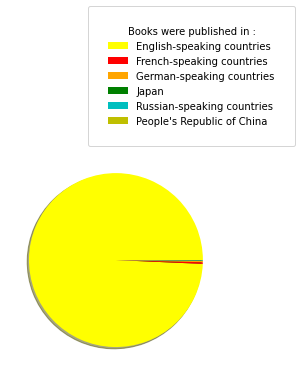

In [ ]:
## Counting how many books were published in different countries
eng,french,german,japan,russian,china=0,0,0,0,0,0
for i in books["isbn13"]:
  i=str(i)
  if i=="nan"or i=="":
    pass
  elif i[3]=="0" or i[3]=="1":
    eng+=1
  elif i[3]=="2":
    french+=1
  elif i[3]=="3":
    german+=1 
  elif i[3]=="4":
    japan+=1
  elif i[3]=="5":
    russian+=1
  elif i[3]=="7":
    china+=1

y=[eng,french,german,japan,russian,china]

## Plotting pie graph for the no. of books published in different countries
plt.pie(y,shadow=True,colors=["#FFFF00","r","orange","g","c","y"])
plt.legend(["English-speaking countries","French-speaking countries",
            "German-speaking countries","Japan","Russian-speaking countries",
            "People's Republic of China"],
           borderpad=2,bbox_to_anchor=(0.35,1.0),title="Books were published in :")
plt.show()

From the above graph, it is clear that maximum of books were published in English-speaking countries.

**Which book received the maximum average rating and who wrote it??**

In [ ]:
c=books.loc[books["average_rating"]==max(books["average_rating"]),["authors","original_title","original_publication_year"]]
print(c)

             authors                  original_title  \
3627  Bill Watterson  The Complete Calvin and Hobbes   

      original_publication_year  
3627                     2005.0  


The book "The Complete Calvin and Hobbes" written by Bill Watterson received maximum average rating.This book was published in the year 2005.